# Fail2ban stats by country

On startup, first run to here to enable interactive widgets for setting parameters, then run the remainder of the notebook

In [5]:
from collections import defaultdict
import sys
import os
import subprocess
import urllib.request
import json
import pandas as pd
from pandas import DataFrame as df
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import interact
from IPython.display import HTML
import glob


sns.set(rc={'figure.figsize':(34, 16)})

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#max_results = widgets.IntSlider()
l = widgets.Layout(width='75%')
try:
    w
except NameError:
    w_default = True
else:
    w_default = False

w = widgets.IntSlider(value=0 if w_default else w.value, min=0, max=1000, step=25, layout=l, description='Maximum results to lookup', style = {'description_width': 'initial'}, continuout_update=True)
display(w)
max_lookups = w.value

w2 = widgets.IntSlider(value=25 if w_default else w2.value, min=5, max=75, step=1, layout=l, description='Truncate plot for countries banned fewer than ', style = {'description_width': 'initial'}, continuout_update=True)
display(w2)
max_plot = w2.value

#w3 = widgets.

w3 = widgets.ToggleButton(
    value=True if w_default else w3.value,
    description='Print statistics table',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Print Print results as a table',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
    icon='' # (FontAwesome names without the `fa-` prefix)
)
display(w3)
print_table = w3.value

w4 = widgets.ToggleButton(
    value=True if w_default else w4.value,
    description='Search all logs',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Search all logs (included rotated logs)',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
    icon='' # (FontAwesome names without the `fa-` prefix)
)
display(w4)


button = widgets.Button(description='Clear data')
display(button)

def clear_data_clicked(b):
    fetch_data = False
    
button.on_click(clear_data_clicked)


IntSlider(value=500, description='Maximum results to lookup', layout=Layout(width='75%'), max=1000, step=25, s…

IntSlider(value=25, description='Truncate plot for countries banned fewer than ', layout=Layout(width='75%'), …

ToggleButton(value=True, description='Print statistics table', tooltip='Print Print results as a table')

ToggleButton(value=True, description='Search all logs', tooltip='Search all logs (included rotated logs)')

Button(description='Clear data', style=ButtonStyle())

In [6]:
try:
    fetch_data
except NameError:
    fetch_data = True

try:
    max_prev
except NameError:
    max_prev = 0
    
#display(fetch_data, max_prev)
if fetch_data or w.value > max_prev:
    max_prev = w.value
    
    logs = ['/var/log/fail2ban.log']
    if w4.value:
        logs.extend(glob.glob('/var/log/fail2ban.log*'))
    ps = subprocess.run(['/home/shmuel/bin/funcs/f2bnets.zsh', *logs], capture_output=True, universal_newlines=True, encoding='utf-8')

    # split output into a temporary list with the /16 subnet truncated
    ip_raw = ps.stdout.split('\n')

    # create a new list for the ips and add .0.0 suffix to each
    ips = []
    for ip in ip_raw:
        ips.append ( ip + '.0.0')

    ipcount = defaultdict(int)
    for ip in ips:
        ipcount[ip] +=1

    geo_API_url = 'http://api.ipstack.com/'
    geo_API_key = '4f90bf0da6f5f385c7d6513c18eeecf8'

    ips_sorted = sorted(ipcount.items(), key=lambda x: x[1], reverse=True)
    num_ips = len(ips_sorted)


    geocount = defaultdict(int)

    for ip in ips_sorted[:w.value]:
        ip_string = ip[0]
        full_API_url = geo_API_url + ip_string + '?access_key=' + geo_API_key
        with urllib.request.urlopen(full_API_url) as response:
            output = response.read().decode('utf-8')
            d = json.loads(output)
    #        print(output, '\n', d)
    #        print(d['country_name'])
            country = d['country_name']

            geocount[country] += int(ip[1])
    fetch_data = False if w.value > 0 else True
#display(fetch_data, max_prev)

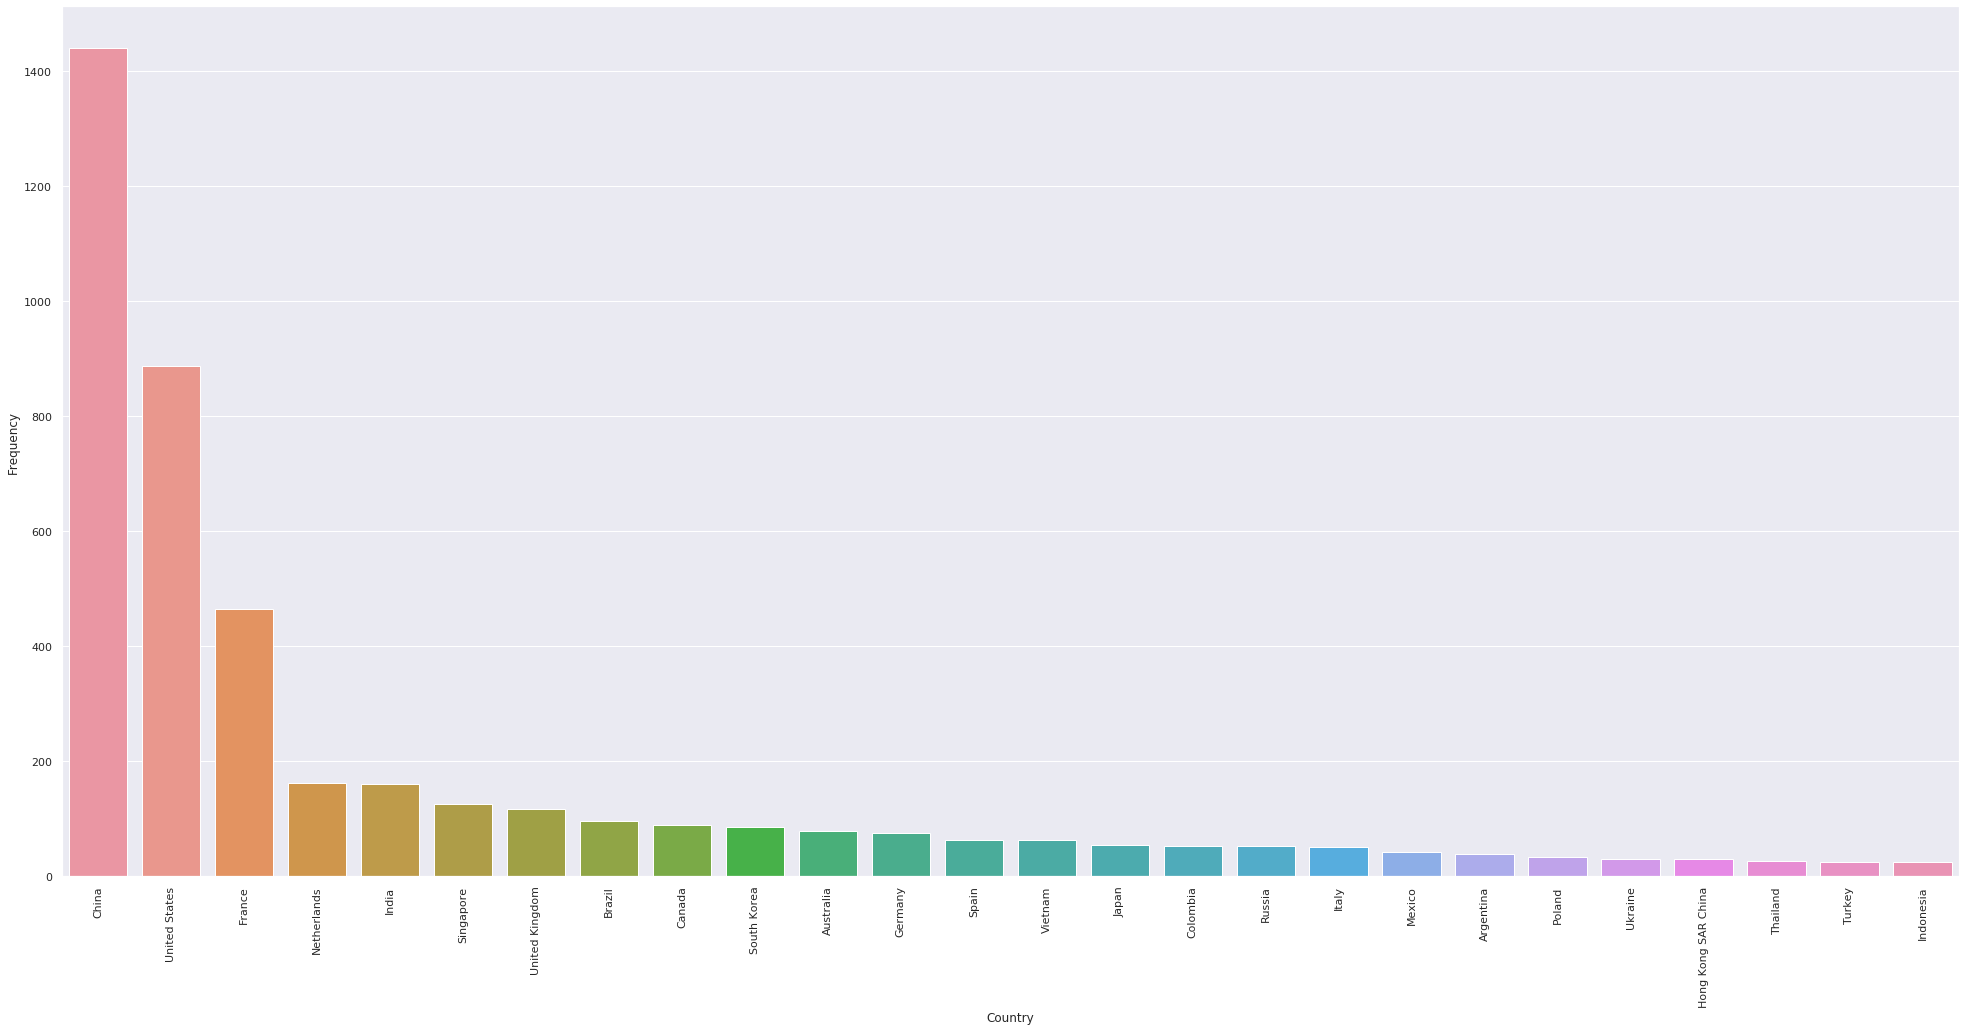

In [7]:
if len(geocount) > 0:
    #print(sorted(geocount.items(), key=lambda x: x[1], reverse=True))
    d1 = df(geocount.items(), columns = ['Country', 'Frequency']).sort_values(by='Frequency', ascending=False)
    d2 = df(geocount.items(), columns = ['Country', 'Frequency']).sort_values(by='Frequency', ascending=False).set_index('Country')
    #display (w2.value)
    
    pd.set_option('display.max_rows', None)
    d_out = sns.barplot(data=d1[d1['Frequency'] >= w2.value], x='Country', y='Frequency');
    for l in d_out.get_xticklabels():
        l.set_rotation(90)

In [8]:
if w3.value and len(geocount) > 0:
    display(d2)

,Frequency
Country,
China,1441
United States,887
France,465
Netherlands,162
India,160
Singapore,126
United Kingdom,116
Brazil,95
Canada,89
